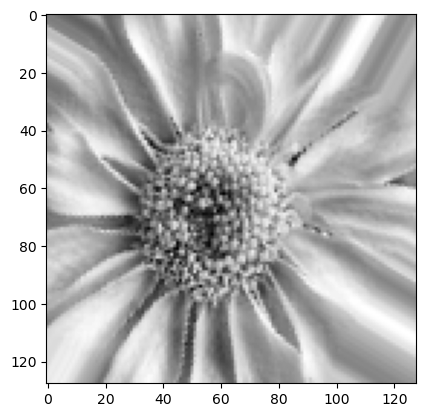

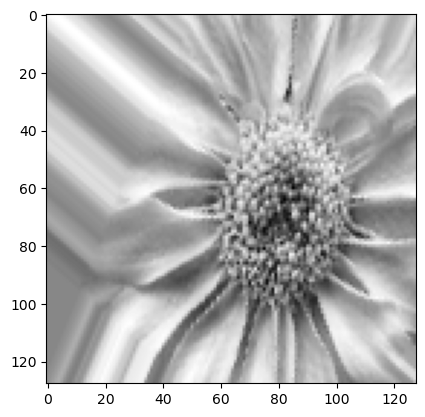

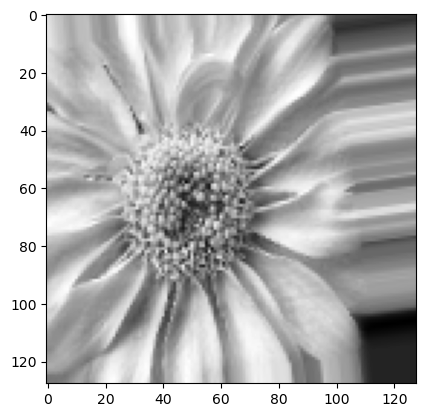

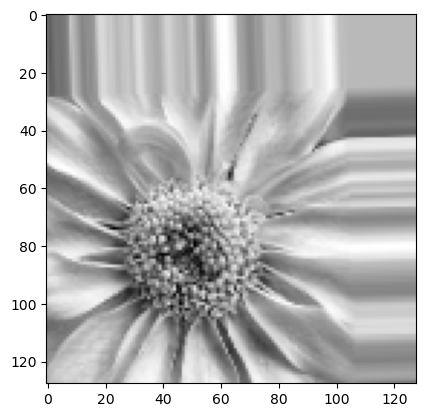

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

# FUNCTION TO LOAD AND PREPROCESS IMAGE 
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)
            
            # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
            clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
            img = clahe.apply(img)
            
            images.append(img)
            labels.append(label)
    
    return images, labels

# DATA PATH
train_daisy_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\train\\daisy"
train_dandelion_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\train\\dandelion"
test_daisy_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\test\\daisy"
test_dandelion_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\test\\dandelion"
valid_daisy_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\valid\\daisy"
valid_dandelion_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\valid\\dandelion"

#  LOAD AND PREPROCESS IMAGE  FOR TRAINING
train_daisy_images, train_daisy_labels = load_and_preprocess_images(train_daisy_dir, label="daisy")
train_dandelion_images, train_dandelion_labels = load_and_preprocess_images(train_dandelion_dir, label="dandelion")


#  LOAD AND PREPROCESS IMAGE FOR TESTING 
test_daisy_images, test_daisy_labels = load_and_preprocess_images(test_daisy_dir, label="daisy")
test_dandelion_images, test_dandelion_labels = load_and_preprocess_images(test_dandelion_dir, label="dandelion")


# LOAD AND PREPROCESS IMAGE FOR VALIDATION
valid_daisy_images, valid_daisy_labels = load_and_preprocess_images(valid_daisy_dir, label="daisy")
valid_dandelion_images, valid_dandelion_labels = load_and_preprocess_images(valid_dandelion_dir, label="dandelion")


# CONCATINATE IMAGES AND LABELS 
X_train = np.concatenate([train_daisy_images, train_dandelion_images], axis=0)
y_train = np.concatenate([train_daisy_labels, train_dandelion_labels], axis=0)

X_test = np.concatenate([test_daisy_images, test_dandelion_images], axis=0)
y_test = np.concatenate([test_daisy_labels, test_dandelion_labels], axis=0)

X_valid = np.concatenate([valid_daisy_images, valid_dandelion_images], axis=0)
y_valid = np.concatenate([valid_daisy_labels, valid_dandelion_labels], axis=0)


# CONVERT LABELS TO NUMERIC FORMAT
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_valid_encoded = label_encoder.transform(y_valid)

# CONVERT LABELS TO ONE HOT ENCODING 
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)
y_valid_onehot = to_categorical(y_valid_encoded)

#NORMALIZE AND PIXEL VALUES 
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0
X_valid_normalized = X_valid.astype('float32') / 255.0


# DATA AUGMENTATION 
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#  FIT THE DATA AUGMENTATION GENERETOR 
datagen.fit(X_train_normalized.reshape(-1, 128, 128, 1))

#APPLYING DATA AUGMENTION IN SINGLE IMAGE 
img = X_train_normalized[0].reshape(128, 128)
plt.imshow(img, cmap='gray')

# RESHAPE IMAGE TO  (1, 128, 128, 1)MATCH THE INPUT SHAPE FOR THE GENERETOR 
img = img.reshape((1,) + img.shape + (1,))

# GENERATE AUGMENTAED IMAGE 
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].reshape(128, 128), cmap='gray')
    i += 1
    if i % 4 == 0:
        break

plt.show()


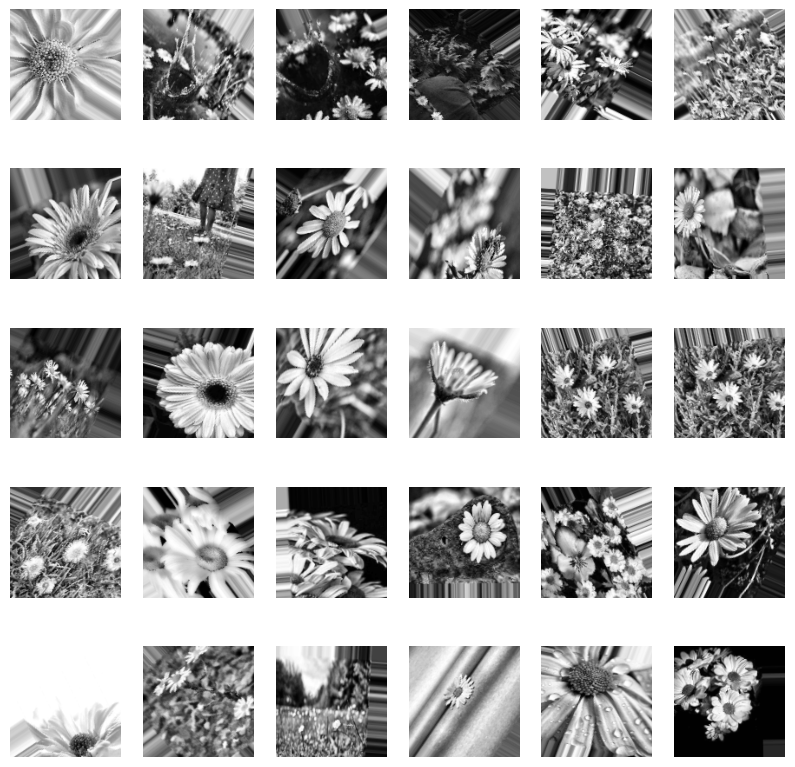

X_train_augmented shape: (1275, 128, 128)
y_train_augmented shape: (1275, 2)
X_test_augmented shape: (204, 128, 128, 1)
y_test_augmented shape: (204, 2)


In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

# FUNCTION TO LOAD AND PREPROCESS IMAGE 
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)
            
            # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
            clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
            img = clahe.apply(img)
            
            images.append(img)
            labels.append(label)
    
    return images, labels

# DATA PATH
train_daisy_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\train\\daisy"
train_dandelion_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\train\\dandelion"
test_daisy_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\test\\daisy"
test_dandelion_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\test\\dandelion"
valid_daisy_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\valid\\daisy"
valid_dandelion_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\valid\\dandelion"

#  LOAD AND PREPROCESS IMAGE  FOR TRAINING
train_daisy_images, train_daisy_labels = load_and_preprocess_images(train_daisy_dir, label="daisy")
train_dandelion_images, train_dandelion_labels = load_and_preprocess_images(train_dandelion_dir, label="dandelion")


#  LOAD AND PREPROCESS IMAGE FOR TESTING 
test_daisy_images, test_daisy_labels = load_and_preprocess_images(test_daisy_dir, label="daisy")
test_dandelion_images, test_dandelion_labels = load_and_preprocess_images(test_dandelion_dir, label="dandelion")


# LOAD AND PREPROCESS IMAGE FOR VALIDATION
valid_daisy_images, valid_daisy_labels = load_and_preprocess_images(valid_daisy_dir, label="daisy")
valid_dandelion_images, valid_dandelion_labels = load_and_preprocess_images(valid_dandelion_dir, label="dandelion")


# CONCATINATE IMAGES AND LABELS 
X_train = np.concatenate([train_daisy_images, train_dandelion_images], axis=0)
y_train = np.concatenate([train_daisy_labels, train_dandelion_labels], axis=0)

X_test = np.concatenate([test_daisy_images, test_dandelion_images], axis=0)
y_test = np.concatenate([test_daisy_labels, test_dandelion_labels], axis=0)

X_valid = np.concatenate([valid_daisy_images, valid_dandelion_images], axis=0)
y_valid = np.concatenate([valid_daisy_labels, valid_dandelion_labels], axis=0)


# CONVERT LABELS TO NUMERIC FORMAT
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_valid_encoded = label_encoder.transform(y_valid)

# CONVERT LABELS TO ONE HOT ENCODING 
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)
y_valid_onehot = to_categorical(y_valid_encoded)

#NORMALIZE AND PIXEL VALUES 
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0
X_valid_normalized = X_valid.astype('float32') / 255.0


# DATA AUGMENTATION 
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#  FIT THE DATA AUGMENTATION GENERETOR 
datagen.fit(X_train_normalized.reshape(-1, 128, 128, 1))



# SPLIT TRAIN AND TESTING SET ON AUGMENTED DATA 
X_train_augmented, X_test_augmented, y_train_augmented, y_test_augmented = train_test_split(
    X_train_augmented, y_train_augmented, test_size=0.2, random_state=42
)

#RESHAPE IMAGE FOR BALANCE WITH THE MODEL  
X_train_augmented = X_train_augmented.reshape(-1, 128, 128, 1)
X_test_augmented = X_test_augmented.reshape(-1, 128, 128, 1)


# APPLY DATA AUGMENTATION TO ALL IMAGE 
X_train_augmented = []
y_train_augmented = []

for img, label in zip(X_train_normalized, y_train_onehot):
    img = img.reshape((1,) + img.shape + (1,))
    for batch in datagen.flow(img, batch_size=1):
        augmented_img = batch[0].reshape(128, 128)
        X_train_augmented.append(augmented_img)
        y_train_augmented.append(label)
        break

# CONVERT AUGMENTED LIST TO NUMPY ARRAYS
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# PRINT 30 AUGMENTED IMAGE 
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.imshow(X_train_augmented[i], cmap='gray')
    plt.axis('off')
plt.show()




print("X_train_augmented shape:", X_train_augmented.shape)
print("y_train_augmented shape:", y_train_augmented.shape)
print("X_test_augmented shape:", X_test_augmented.shape)
print("y_test_augmented shape:", y_test_augmented.shape)

Epoch 1/10
40/40 [==============================] - 26s 610ms/step - loss: 0.7206 - accuracy: 0.5553 - val_loss: 0.7419 - val_accuracy: 0.5522
Epoch 2/10
40/40 [==============================] - 27s 676ms/step - loss: 0.6882 - accuracy: 0.5788 - val_loss: 0.6862 - val_accuracy: 0.5522
Epoch 3/10
40/40 [==============================] - 30s 742ms/step - loss: 0.6811 - accuracy: 0.5851 - val_loss: 0.6820 - val_accuracy: 0.5522
Epoch 4/10
40/40 [==============================] - 33s 804ms/step - loss: 0.6783 - accuracy: 0.5710 - val_loss: 0.6743 - val_accuracy: 0.5522
Epoch 5/10
40/40 [==============================] - 32s 803ms/step - loss: 0.6633 - accuracy: 0.6188 - val_loss: 0.6426 - val_accuracy: 0.6346
Epoch 6/10
40/40 [==============================] - 32s 794ms/step - loss: 0.6455 - accuracy: 0.6431 - val_loss: 0.6236 - val_accuracy: 0.6621
Epoch 7/10
40/40 [==============================] - 30s 745ms/step - loss: 0.6220 - accuracy: 0.6682 - val_loss: 0.5910 - val_accuracy: 0.7005

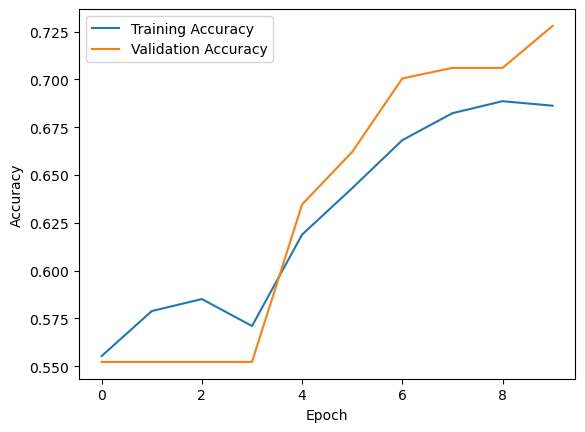

In [4]:
#perform cnn model 

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


# FUNCTION TO LOAD AND PREPROCESS IMAGE 
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)
            
            # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
            clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
            img = clahe.apply(img)
            
            images.append(img)
            labels.append(label)
    
    return images, labels

# DATA PATH
train_daisy_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\train\\daisy"
train_dandelion_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\train\\dandelion"
test_daisy_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\test\\daisy"
test_dandelion_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\test\\dandelion"
valid_daisy_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\valid\\daisy"
valid_dandelion_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\valid\\dandelion"

#  LOAD AND PREPROCESS IMAGE  FOR TRAINING
train_daisy_images, train_daisy_labels = load_and_preprocess_images(train_daisy_dir, label="daisy")
train_dandelion_images, train_dandelion_labels = load_and_preprocess_images(train_dandelion_dir, label="dandelion")


#  LOAD AND PREPROCESS IMAGE FOR TESTING 
test_daisy_images, test_daisy_labels = load_and_preprocess_images(test_daisy_dir, label="daisy")
test_dandelion_images, test_dandelion_labels = load_and_preprocess_images(test_dandelion_dir, label="dandelion")


# LOAD AND PREPROCESS IMAGE FOR VALIDATION
valid_daisy_images, valid_daisy_labels = load_and_preprocess_images(valid_daisy_dir, label="daisy")
valid_dandelion_images, valid_dandelion_labels = load_and_preprocess_images(valid_dandelion_dir, label="dandelion")


# CONCATINATE IMAGES AND LABELS 
X_train = np.concatenate([train_daisy_images, train_dandelion_images], axis=0)
y_train = np.concatenate([train_daisy_labels, train_dandelion_labels], axis=0)

X_test = np.concatenate([test_daisy_images, test_dandelion_images], axis=0)
y_test = np.concatenate([test_daisy_labels, test_dandelion_labels], axis=0)

X_valid = np.concatenate([valid_daisy_images, valid_dandelion_images], axis=0)
y_valid = np.concatenate([valid_daisy_labels, valid_dandelion_labels], axis=0)


# CONVERT LABELS TO NUMERIC FORMAT
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_valid_encoded = label_encoder.transform(y_valid)

# CONVERT LABELS TO ONE HOT ENCODING 
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)
y_valid_onehot = to_categorical(y_valid_encoded)

#NORMALIZE AND PIXEL VALUES 
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0
X_valid_normalized = X_valid.astype('float32') / 255.0


# DATA AUGMENTATION 
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#  FIT THE DATA AUGMENTATION GENERETOR 
datagen.fit(X_train_normalized.reshape(-1, 128, 128, 1))



# SPLIT TRAIN AND TESTING SET ON AUGMENTED DATA 
X_train_augmented, X_test_augmented, y_train_augmented, y_test_augmented = train_test_split(
    X_train_augmented, y_train_augmented, test_size=0.2, random_state=42
)

#RESHAPE IMAGE FOR BALANCE WITH THE MODEL  
X_train_augmented = X_train_augmented.reshape(-1, 128, 128, 1)
X_test_augmented = X_test_augmented.reshape(-1, 128, 128, 1)





# BUILD CNN MODEL 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))  # ASSUMING 2 CLASSES (daisy and dandelion)

# COMPILE THE MODEL 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#TRAIN THE MODEL 
history = model.fit(datagen.flow(X_train_normalized.reshape(-1, 128, 128, 1), y_train_onehot),
                    epochs=10,
                    validation_data=(X_valid_normalized.reshape(-1, 128, 128, 1), y_valid_onehot))

#EVALUATE THE MODEL ON THE TEST SET 
test_loss, test_acc = model.evaluate(X_test_normalized.reshape(-1, 128, 128, 1), y_test_onehot)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# PLOT
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/20
32/32 [==============================] - 77s 2s/step - loss: 0.6888 - accuracy: 0.5824 - val_loss: 0.6914 - val_accuracy: 0.5522
Epoch 2/20
32/32 [==============================] - 70s 2s/step - loss: 0.6792 - accuracy: 0.5971 - val_loss: 0.6869 - val_accuracy: 0.5522
Epoch 3/20
32/32 [==============================] - 69s 2s/step - loss: 0.6764 - accuracy: 0.5902 - val_loss: 0.6841 - val_accuracy: 0.5549
Epoch 4/20
32/32 [==============================] - 64s 2s/step - loss: 0.6665 - accuracy: 0.6029 - val_loss: 0.6662 - val_accuracy: 0.5879
Epoch 5/20
32/32 [==============================] - 70s 2s/step - loss: 0.6685 - accuracy: 0.6029 - val_loss: 0.6594 - val_accuracy: 0.6016
Epoch 6/20
32/32 [==============================] - 90s 3s/step - loss: 0.6556 - accuracy: 0.6431 - val_loss: 0.6451 - val_accuracy: 0.6236
Epoch 7/20
32/32 [==============================] - 69s 2s/step - loss: 0.6458 - accuracy: 0.6471 - val_loss: 0.6520 - val_accuracy: 0.6181
Epoch 8/20
32/32 [==

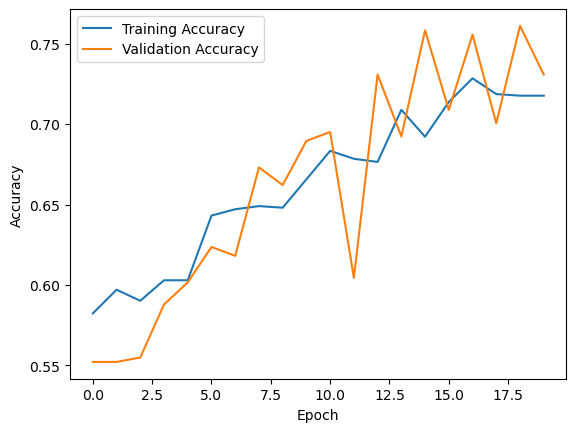

6/6 [==============================] - 4s 531ms/step


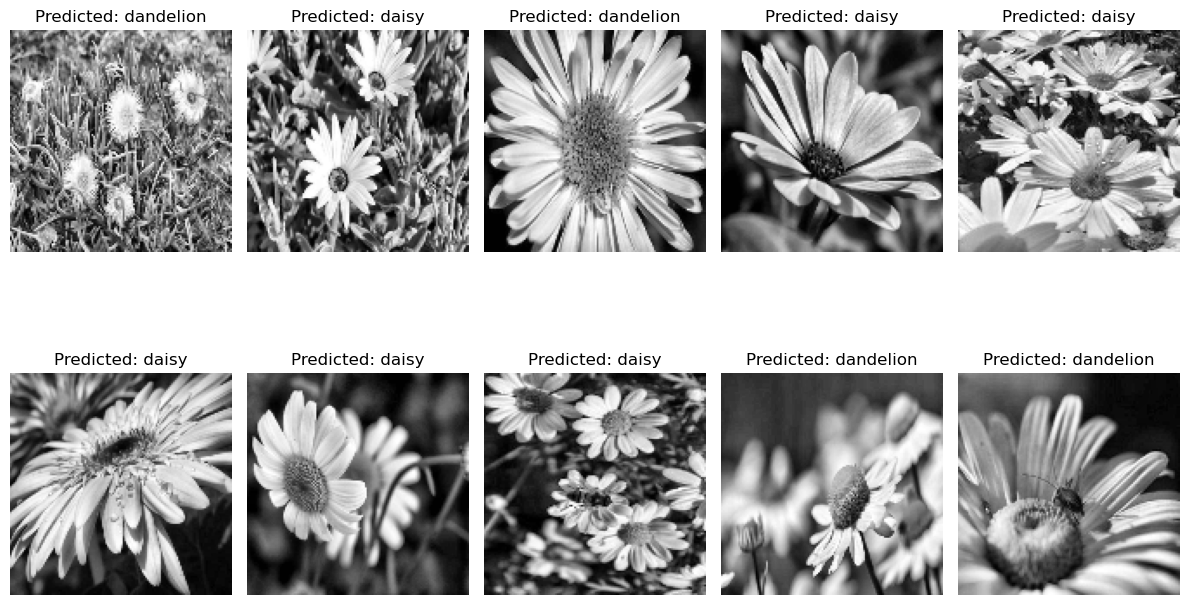

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


# FUNCTION TO LOAD AND PREPROCESS IMAGE 
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)
            
            # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
            clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
            img = clahe.apply(img)
            
            images.append(img)
            labels.append(label)
    
    return images, labels

# DATA PATH
train_daisy_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\train\\daisy"
train_dandelion_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\train\\dandelion"
test_daisy_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\test\\daisy"
test_dandelion_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\test\\dandelion"
valid_daisy_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\valid\\daisy"
valid_dandelion_dir = "C:\\Users\\nh013\\Desktop\\Flowers Datasets (dandelion & daisy)\\valid\\dandelion"

#  LOAD AND PREPROCESS IMAGE  FOR TRAINING
train_daisy_images, train_daisy_labels = load_and_preprocess_images(train_daisy_dir, label="daisy")
train_dandelion_images, train_dandelion_labels = load_and_preprocess_images(train_dandelion_dir, label="dandelion")


#  LOAD AND PREPROCESS IMAGE FOR TESTING 
test_daisy_images, test_daisy_labels = load_and_preprocess_images(test_daisy_dir, label="daisy")
test_dandelion_images, test_dandelion_labels = load_and_preprocess_images(test_dandelion_dir, label="dandelion")


# LOAD AND PREPROCESS IMAGE FOR VALIDATION
valid_daisy_images, valid_daisy_labels = load_and_preprocess_images(valid_daisy_dir, label="daisy")
valid_dandelion_images, valid_dandelion_labels = load_and_preprocess_images(valid_dandelion_dir, label="dandelion")


# CONCATINATE IMAGES AND LABELS 
X_train = np.concatenate([train_daisy_images, train_dandelion_images], axis=0)
y_train = np.concatenate([train_daisy_labels, train_dandelion_labels], axis=0)

X_test = np.concatenate([test_daisy_images, test_dandelion_images], axis=0)
y_test = np.concatenate([test_daisy_labels, test_dandelion_labels], axis=0)

X_valid = np.concatenate([valid_daisy_images, valid_dandelion_images], axis=0)
y_valid = np.concatenate([valid_daisy_labels, valid_dandelion_labels], axis=0)


# CONVERT LABELS TO NUMERIC FORMAT
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_valid_encoded = label_encoder.transform(y_valid)

# CONVERT LABELS TO ONE HOT ENCODING 
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)
y_valid_onehot = to_categorical(y_valid_encoded)

#NORMALIZE AND PIXEL VALUES 
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0
X_valid_normalized = X_valid.astype('float32') / 255.0


# DATA AUGMENTATION 
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#  FIT THE DATA AUGMENTATION GENERETOR 
datagen.fit(X_train_normalized.reshape(-1, 128, 128, 1))



# SPLIT TRAIN AND TESTING SET ON AUGMENTED DATA 
X_train_augmented, X_test_augmented, y_train_augmented, y_test_augmented = train_test_split(
    X_train_normalized, y_train_onehot, test_size=0.2, random_state=42
)

#RESHAPE IMAGE FOR BALANCE WITH THE MODEL  
X_train_augmented = X_train_augmented.reshape(-1, 128, 128, 1)
X_test_augmented = X_test_augmented.reshape(-1, 128, 128, 1)




#BUILD CNN MODEL 
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

# COMPILE THE MODEL 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# TRAIN THE MODEL 
history = model.fit(datagen.flow(X_train_augmented, y_train_augmented),
                    epochs=20,
                    validation_data=(X_valid_normalized.reshape(-1, 128, 128, 1), y_valid_onehot),
                    batch_size=32)  

# EVALUATE THE MODEL ON THE TEST SET
test_loss, test_acc = model.evaluate(X_test_normalized.reshape(-1, 128, 128, 1), y_test_onehot)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# PLOT 
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# MAKE PREDICTION ON TEST SET
y_test_pred_prob = model.predict(X_test_normalized.reshape(-1, 128, 128, 1))
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_labels = label_encoder.inverse_transform(y_test_pred)

# PLOT SOME PREDICTED IMAGE 
plt.figure(figsize=(12, 8))
for i in range(10):  
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(128, 128), cmap='gray')
    plt.title(f"Predicted: {y_test_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()